In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft
import wave
from scipy import signal


In [8]:
def generateTone(f, fs, duration):   
    volume = 0.00001  # range [0.0, 1.0]
    #fs = 44100  # sampling rate, Hz, must be integer
    #duration = 5.0  # in seconds, may be float
    #f = 300.0  # sine frequency, Hz, may be float

    # generate samples, note conversion to float32 array
    samples = (np.sin(2 * np.pi * np.arange(fs * duration) * f / fs))
    signal = 32767*samples
    return signal

In [9]:
def changeVolume(signal, mod):
    return (signal * pow(2, (np.sqrt(np.sqrt(np.sqrt(mod))) * 192 - 192)/6)).astype(np.int16)

In [10]:
def delay(signal, nframes):
    if (nframes == 0):
        return signal
    return np.concatenate((np.zeros(nframes), signal[:-nframes]))

In [11]:
def play(leftVol, rightVol, leftDel, rightDel):
    framerate = 44100
    left = right = generateTone(300.0, 44100, 2.0)

    loadSpeech = True
    if loadSpeech:
        obj = wave.open("../Audio/speech.wav", "rb")
        nchannels = obj.getnchannels()
        framerate = obj.getframerate()
        fr = np.frombuffer(obj.readframes(-1), dtype=np.int16)
        left = right = fr    
    left = changeVolume(left, leftVol)
    right = changeVolume(right, rightVol)

    left = delay(left, leftDel)
    right = delay(right, rightDel)

    #signal = signal.astype(np.int16)
    signal = np.insert(right, np.arange(len(left)), left)
    output = "output.wav"
    obj_new = wave.open(output, "wb")
    obj_new.setnchannels(2)
    obj_new.setsampwidth(2)
    obj_new.setframerate(framerate)
    obj_new.writeframes(signal)

    print("Stosunek prawego kanalu do lewego: ", max(right)/max(left))
    print("Stosunek lewego kanalu do prawego: ", max(left)/max(right))
    print("Sklad prawy: ", int(max(right))/(int(max(right))+int(max(left))))
    print(framerate)
    return signal, Audio(filename=output)

In [14]:
fs = 24000

aoa = 0
ldel = fs*((0.10*np.sin(aoa))/345)
ldel = 0
print(aoa, ldel)
s000, audio = play(np.sin(aoa + np.pi/2), 1, int(ldel), 0)

aoa = np.pi/6
ldel = fs*((0.10*np.sin(aoa))/345)
ldel = 0
print(aoa, ldel)
s030, audio = play(np.sin(aoa + np.pi/2), 1, int(ldel), 0)

aoa = np.pi/4
ldel = fs*((0.10*np.sin(aoa))/345)
ldel = 0
print(aoa, ldel)
s045, audio = play(np.sin(aoa + np.pi/2), 1, int(ldel), 0)

aoa = np.pi/3
ldel = fs*((0.10*np.sin(aoa))/345)
ldel = 0
print(aoa, ldel)
s060, audio = play(np.sin(aoa + np.pi/2), 1, int(ldel), 0)

aoa = np.pi/2
ldel = fs*((0.10*np.sin(aoa))/345)
ldel = 0
print(aoa, ldel)
s090, audio = play(np.sin(aoa + np.pi/2), 1, int(ldel), 0)

signal = np.concatenate((s000, s030, s045, s060, s090))
output= "output.wav"
obj_new = wave.open(output, "wb")
obj_new.setnchannels(2)
obj_new.setsampwidth(2)
obj_new.setframerate(fs)
obj_new.writeframes(signal)
Audio(filename=output)

0 0
Stosunek prawego kanalu do lewego:  1.0
Stosunek lewego kanalu do prawego:  1.0
Sklad prawy:  0.5
24000
0.5235987755982988 0
Stosunek prawego kanalu do lewego:  1.4848244080724615
Stosunek lewego kanalu do prawego:  0.673480308219178
Sklad prawy:  0.5975570761655049
24000
0.7853981633974483 0
Stosunek prawego kanalu do lewego:  2.56140350877193
Stosunek lewego kanalu do prawego:  0.3904109589041096
Sklad prawy:  0.7192118226600985
24000
1.0471975511965976 0
Stosunek prawego kanalu do lewego:  6.304993252361673
Stosunek lewego kanalu do prawego:  0.1586044520547945
Sklad prawy:  0.8631073341954554
24000
1.5707963267948966 0
Stosunek prawego kanalu do lewego:  inf
Stosunek lewego kanalu do prawego:  0.0
Sklad prawy:  1.0
24000


C:\Users\Filip\AppData\Local\Temp\ipykernel_6976\3340376259.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  print("Stosunek prawego kanalu do lewego: ", max(right)/max(left))


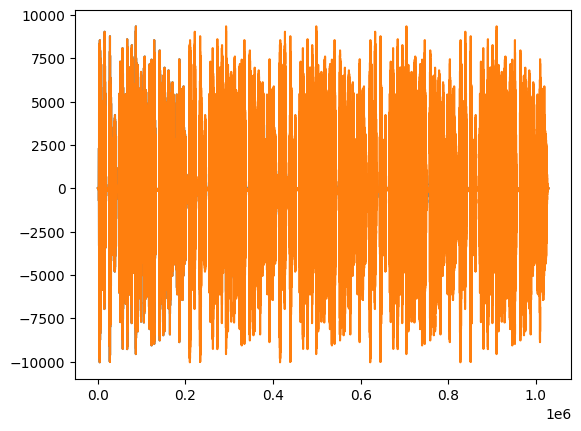

In [16]:
plt.plot(signal[::2])
plt.plot(signal[1::2])